In [87]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
from PIL import Image


In [88]:
files = []
pictures = []
path = 'C:/Users/yorba/Downloads/archive (1)/train/cat/'
for file in os.listdir('C:/Users/yorba/Downloads/archive (1)/train/cat'):
    files.append(file)
    img = cv2.imread(path + file)
    img = cv2.resize(img,(128,128))
    pictures.append(img.flatten())
traincat = pd.DataFrame({"images": files})
traincat["yescat"] = 1
traincat['pictures'] = pictures
files = []
pictures = []
path = 'C:/Users/yorba/Downloads/archive (1)/train/dog/'
for file in os.listdir('C:/Users/yorba/Downloads/archive (1)/train/dog'):
    files.append(file)
    img = cv2.imread(path + file)
    img = cv2.resize(img,(128,128))
    pictures.append(img.flatten())
dog = pd.DataFrame({"images": files})
dog["yescat"] = 0
dog['pictures'] = pictures
traincat = pd.concat([dog, traincat])
traincat['pictures'] = traincat.apply(lambda row: np.array(row.pictures).flatten(), axis = 1).tolist()
traincat.head()
traincat.shape

(275, 3)

In [89]:
files = []
for file in os.listdir('C:/Users/yorba/Downloads/archive (1)/val/cat'):
    files.append(file)
valcat = pd.DataFrame({"images" : files})
valcat["yescat"] = 1
files = []
for file in os.listdir('C:/Users/yorba/Downloads/archive (1)/val/dog'):
    files.append(file)
dog = pd.DataFrame({"images": files})
dog["yescat"] = 0
valcat = pd.concat([dog, valcat])
print(valcat)


                                               images  yescat
0   american_bulldog_12_jpg.rf.d6fd6535cb14c95b229...       0
1   american_bulldog_144_jpg.rf.fe735e7242d35533bb...       0
2   american_bulldog_148_jpg.rf.f0a7b86489589aa055...       0
3   american_pit_bull_terrier_117_jpg.rf.f8a569795...       0
4   american_pit_bull_terrier_134_jpg.rf.fae91eb60...       0
..                                                ...     ...
19  Siamese_158_jpg.rf.fad9e8f3a0a6866d0f9b5adc395...       1
20  Siamese_164_jpg.rf.ef30fae7ee22d7922dab34d52de...       1
21  Sphynx_104_jpg.rf.e7cb65a6212f786130b1bf1bf6d1...       1
22  Sphynx_127_jpg.rf.fd8a6c4badb0a087873c84aa4ab6...       1
23  Sphynx_142_jpg.rf.f01978b5d26b5c07865746b712f2...       1

[70 rows x 2 columns]


In [90]:
traincat['yescat'] = np.where(traincat['yescat'] == 1, 'cat', 'dog')
traincat.groupby('yescat').size()

yescat
cat     95
dog    180
dtype: int64

In [91]:
traincat['target'] = np.where(traincat['yescat'] =='cat', 1,0 )
traincat[["target", "yescat"]].value_counts()

target  yescat
0       dog       180
1       cat        95
Name: count, dtype: int64

In [92]:
X = np.vstack(traincat['pictures'])
Y = traincat['target']


In [93]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
pca = PCA(n_components=10, whiten=True, random_state=13)
scaler = StandardScaler()

In [94]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [95]:
model = MLPClassifier(hidden_layer_sizes=[300, 100], activation= 'relu', random_state= 13, verbose=True, early_stopping= True)
%time model.fit(X_train_scaled,Y_train)

Iteration 1, loss = 0.68598706
Validation score: 0.619048
Iteration 2, loss = 5.69954303
Validation score: 0.523810
Iteration 3, loss = 4.98098823
Validation score: 0.523810
Iteration 4, loss = 3.57826225
Validation score: 0.428571
Iteration 5, loss = 1.36926704
Validation score: 0.428571
Iteration 6, loss = 1.70738611
Validation score: 0.476190
Iteration 7, loss = 0.77565871
Validation score: 0.619048
Iteration 8, loss = 0.08801956
Validation score: 0.619048
Iteration 9, loss = 0.85894882
Validation score: 0.619048
Iteration 10, loss = 0.16470849
Validation score: 0.571429
Iteration 11, loss = 0.01056227
Validation score: 0.571429
Iteration 12, loss = 0.11305468
Validation score: 0.619048
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
CPU times: total: 32.6 s
Wall time: 13.6 s


,"hidden_layer_sizes hidden_layer_sizes: array-like of shape(n_layers - 2,), default=(100,)The ith element represents the number of neurons in the ithhidden layer.","[300, 100]"
,"activation activation: {'identity', 'logistic', 'tanh', 'relu'}, default='relu'Activation function for the hidden layer.- 'identity', no-op activation, useful to implement linear bottleneck, returns f(x) = x- 'logistic', the logistic sigmoid function, returns f(x) = 1 / (1 + exp(-x)).- 'tanh', the hyperbolic tan function, returns f(x) = tanh(x).- 'relu', the rectified linear unit function, returns f(x) = max(0, x)",'relu'
,"solver solver: {'lbfgs', 'sgd', 'adam'}, default='adam'The solver for weight optimization.- 'lbfgs' is an optimizer in the family of quasi-Newton methods.- 'sgd' refers to stochastic gradient descent.- 'adam' refers to a stochastic gradient-based optimizer proposed by Kingma, Diederik, and Jimmy BaFor a comparison between Adam optimizer and SGD, see:ref:`sphx_glr_auto_examples_neural_networks_plot_mlp_training_curves.py`.Note: The default solver 'adam' works pretty well on relativelylarge datasets (with thousands of training samples or more) in terms ofboth training time and validation score.For small datasets, however, 'lbfgs' can converge faster and performbetter.",'adam'
,"alpha alpha: float, default=0.0001Strength of the L2 regularization term. The L2 regularization termis divided by the sample size when added to the loss.For an example usage and visualization of varying regularization, see:ref:`sphx_glr_auto_examples_neural_networks_plot_mlp_alpha.py`.",0.0001
,"batch_size batch_size: int, default='auto'Size of minibatches for stochastic optimizers.If the solver is 'lbfgs', the classifier will not use minibatch.When set to ""auto"", `batch_size=min(200, n_samples)`.",'auto'
,"learning_rate learning_rate: {'constant', 'invscaling', 'adaptive'}, default='constant'Learning rate schedule for weight updates.- 'constant' is a constant learning rate given by 'learning_rate_init'.- 'invscaling' gradually decreases the learning rate at each time step 't' using an inverse scaling exponent of 'power_t'. effective_learning_rate = learning_rate_init / pow(t, power_t)- 'adaptive' keeps the learning rate constant to 'learning_rate_init' as long as training loss keeps decreasing. Each time two consecutive epochs fail to decrease training loss by at least tol, or fail to increase validation score by at least tol if 'early_stopping' is on, the current learning rate is divided by 5.Only used when ``solver='sgd'``.",'constant'
,"learning_rate_init learning_rate_init: float, default=0.001The initial learning rate used. It controls the step-sizein updating the weights. Only used when solver='sgd' or 'adam'.",0.001
,"power_t power_t: float, default=0.5The exponent for inverse scaling learning rate.It is used in updating effective learning rate when the learning_rateis set to 'invscaling'. Only used when solver='sgd'.",0.5
,"max_iter max_iter: int, default=200Maximum number of iterations. The solver iterates until convergence(determined by 'tol') or this number of iterations. For stochasticsolvers ('sgd', 'adam'), note that this determines the number of epochs(how many times each data point will be used), not the number ofgradient steps.",200
,"shuffle shuffle: bool, default=TrueWhether to shuffle samples in each iteration. Only used whensolver='sgd' or 'adam'.",True
,"random_state random_state: int, RandomState instance, default=NoneDetermines random number generation for weights and biasinitialization, train-test split if early stopping is used, and batchsampling when solver='sgd' or 'adam'.Pass an int for reproducible results across multiple function calls.See :term:`Glossary `.",13


In [96]:
model_pca = MLPClassifier(hidden_layer_sizes=[100], alpha=0.1, activation='relu', random_state=13, verbose=True, early_stopping=True)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.fit_transform(X_test_scaled)
%time model_pca.fit(X_train_pca, Y_train)

Iteration 1, loss = 0.66987406
Validation score: 0.523810
Iteration 2, loss = 0.66612615
Validation score: 0.571429
Iteration 3, loss = 0.66250117
Validation score: 0.619048
Iteration 4, loss = 0.65899572
Validation score: 0.619048
Iteration 5, loss = 0.65560579
Validation score: 0.619048
Iteration 6, loss = 0.65233028
Validation score: 0.619048
Iteration 7, loss = 0.64915764
Validation score: 0.666667
Iteration 8, loss = 0.64608181
Validation score: 0.666667
Iteration 9, loss = 0.64308623
Validation score: 0.666667
Iteration 10, loss = 0.64018535
Validation score: 0.666667
Iteration 11, loss = 0.63738035
Validation score: 0.666667
Iteration 12, loss = 0.63465989
Validation score: 0.666667
Iteration 13, loss = 0.63202668
Validation score: 0.666667
Iteration 14, loss = 0.62946950
Validation score: 0.619048
Iteration 15, loss = 0.62699075
Validation score: 0.619048
Iteration 16, loss = 0.62458549
Validation score: 0.619048
Iteration 17, loss = 0.62224996
Validation score: 0.619048
Iterat

,"hidden_layer_sizes hidden_layer_sizes: array-like of shape(n_layers - 2,), default=(100,)The ith element represents the number of neurons in the ithhidden layer.",[100]
,"activation activation: {'identity', 'logistic', 'tanh', 'relu'}, default='relu'Activation function for the hidden layer.- 'identity', no-op activation, useful to implement linear bottleneck, returns f(x) = x- 'logistic', the logistic sigmoid function, returns f(x) = 1 / (1 + exp(-x)).- 'tanh', the hyperbolic tan function, returns f(x) = tanh(x).- 'relu', the rectified linear unit function, returns f(x) = max(0, x)",'relu'
,"solver solver: {'lbfgs', 'sgd', 'adam'}, default='adam'The solver for weight optimization.- 'lbfgs' is an optimizer in the family of quasi-Newton methods.- 'sgd' refers to stochastic gradient descent.- 'adam' refers to a stochastic gradient-based optimizer proposed by Kingma, Diederik, and Jimmy BaFor a comparison between Adam optimizer and SGD, see:ref:`sphx_glr_auto_examples_neural_networks_plot_mlp_training_curves.py`.Note: The default solver 'adam' works pretty well on relativelylarge datasets (with thousands of training samples or more) in terms ofboth training time and validation score.For small datasets, however, 'lbfgs' can converge faster and performbetter.",'adam'
,"alpha alpha: float, default=0.0001Strength of the L2 regularization term. The L2 regularization termis divided by the sample size when added to the loss.For an example usage and visualization of varying regularization, see:ref:`sphx_glr_auto_examples_neural_networks_plot_mlp_alpha.py`.",0.1
,"batch_size batch_size: int, default='auto'Size of minibatches for stochastic optimizers.If the solver is 'lbfgs', the classifier will not use minibatch.When set to ""auto"", `batch_size=min(200, n_samples)`.",'auto'
,"learning_rate learning_rate: {'constant', 'invscaling', 'adaptive'}, default='constant'Learning rate schedule for weight updates.- 'constant' is a constant learning rate given by 'learning_rate_init'.- 'invscaling' gradually decreases the learning rate at each time step 't' using an inverse scaling exponent of 'power_t'. effective_learning_rate = learning_rate_init / pow(t, power_t)- 'adaptive' keeps the learning rate constant to 'learning_rate_init' as long as training loss keeps decreasing. Each time two consecutive epochs fail to decrease training loss by at least tol, or fail to increase validation score by at least tol if 'early_stopping' is on, the current learning rate is divided by 5.Only used when ``solver='sgd'``.",'constant'
,"learning_rate_init learning_rate_init: float, default=0.001The initial learning rate used. It controls the step-sizein updating the weights. Only used when solver='sgd' or 'adam'.",0.001
,"power_t power_t: float, default=0.5The exponent for inverse scaling learning rate.It is used in updating effective learning rate when the learning_rateis set to 'invscaling'. Only used when solver='sgd'.",0.5
,"max_iter max_iter: int, default=200Maximum number of iterations. The solver iterates until convergence(determined by 'tol') or this number of iterations. For stochasticsolvers ('sgd', 'adam'), note that this determines the number of epochs(how many times each data point will be used), not the number ofgradient steps.",200
,"shuffle shuffle: bool, default=TrueWhether to shuffle samples in each iteration. Only used whensolver='sgd' or 'adam'.",True
,"random_state random_state: int, RandomState instance, default=NoneDetermines random number generation for weights and biasinitialization, train-test split if early stopping is used, and batchsampling when solver='sgd' or 'adam'.Pass an int for reproducible results across multiple function calls.See :term:`Glossary `.",13


In [97]:
print(model.score(X_test_scaled, Y_test))
print(model_pca.score(X_test_pca, Y_test))

0.4927536231884058
0.6376811594202898


0.6376811594202898
              precision    recall  f1-score   support

           0       0.66      0.96      0.78        46
           1       0.00      0.00      0.00        23

    accuracy                           0.64        69
   macro avg       0.33      0.48      0.39        69
weighted avg       0.44      0.64      0.52        69



Text(0.5, 1.0, 'CM')

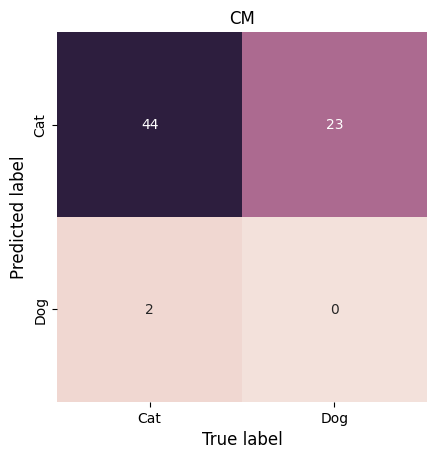

In [98]:
y_predict_train = model_pca.predict(X_train_pca)
y_predict_test = model_pca.predict(X_test_pca)

print(accuracy_score(Y_test, y_predict_test))
print(classification_report(Y_test, y_predict_test))
cmap = sns.cubehelix_palette(light = 0.9, as_cmap = True)
cm = confusion_matrix(Y_test, y_predict_test)
sns.heatmap(cm.T, square = True, annot = True, fmt = 'd', cbar = False, xticklabels=['Cat', 'Dog'], yticklabels= ['Cat', 'Dog'], cmap= cmap)
plt.xlabel('True label', size = 12)
plt.ylabel('Predicted label', size = 12)
plt.title('CM')

prediction: Dog
confidence: Cat: 0.62, Dog: 0.38


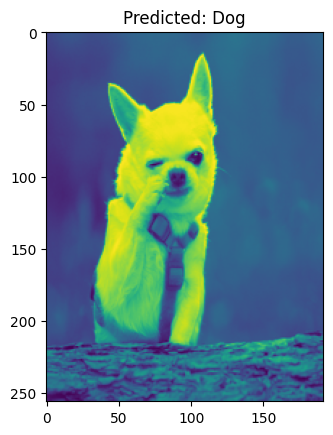

In [105]:
def predict_image(img_path):
    img = Image.open(img_path).convert('L').resize((192, 256))
    img_flat = np.array(img).flatten().reshape(1,-1)
    scaled_img = scaler.transform(img_flat)
    img_pca = pca.transform(scaled_img)
    prediction = model_pca.predict(img_pca)
    probability = model_pca.predict_proba(img_pca)

    label = 'Cat' if prediction[0] == 1 else "Dog"
    print(f"prediction: {label}")
    print(f"confidence: Cat: {probability[0][0]:.2f}, Dog: {probability[0][1]:.2f}")
    plt.imshow(img)
    plt.title(f'Predicted: {label}')
    plt.show()

predict_image("dog 2.jpg")